## Data Cleaning Error Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## Daten laden

In [2]:
cleaning = pd.read_parquet('../../data/cleaning_analysis_new_v4.parquet')

In [4]:
events = pd.read_csv('../../data/cleaned/events.csv')

In [6]:
events = pd.read_csv('../../data/cleaned/events.csv')
events = events[events['step'].notna()].reset_index()
events['step'] = events['step'].astype('int')

In [7]:
cleaning = pd.merge(cleaning, events[['series_id', 'step', 'event']], on=['series_id', 'step'], how='left')

In [3]:
bool_to_int = {True: 1, False: 0}
cleaning['correct_cleaning'] = (cleaning['unknown'] == cleaning['clean']).map(bool_to_int.get)

## Daten analysieren

In [4]:
whole_size = len(cleaning)
cleaned_size = len(cleaning[cleaning.clean == 1])

percentage_cleaned = cleaned_size / whole_size

print(whole_size)
print(cleaned_size)
print(percentage_cleaned * 100, '%')

127946340
37753190
29.507049595947798 %


In [5]:
print('accuracy_score: ', accuracy_score(cleaning['unknown'], cleaning['clean']))
print('recall_score: ', recall_score(cleaning['unknown'], cleaning['clean']))
print('precision_score: ', precision_score(cleaning['unknown'], cleaning['clean']))
print('f1_score: ', f1_score(cleaning['unknown'], cleaning['clean']))

accuracy_score:  0.8829841478857465
recall_score:  0.7238933908686597
precision_score:  0.9755080564052998
f1_score:  0.8310735946514559


## Daten visualisieren

In [6]:
participant_series_id = '16fe2798ed0f'

participant_cleaning = cleaning[cleaning.series_id == participant_series_id].copy()

participant_cleaning[participant_cleaning.clean == 1]

,series_id,step,timestamp,anglez,enmo,unknown,clean,correct_cleaning
13475160,16fe2798ed0f,26640,2017-11-03T05:15:00-0400,-5.3694,0.0038,1,1,1
13475161,16fe2798ed0f,26641,2017-11-03T05:15:05-0400,-5.3239,0.0038,1,1,1
13475162,16fe2798ed0f,26642,2017-11-03T05:15:10-0400,-5.1422,0.0037,1,1,1
13475163,16fe2798ed0f,26643,2017-11-03T05:15:15-0400,-5.1467,0.0035,1,1,1
13475164,16fe2798ed0f,26644,2017-11-03T05:15:20-0400,-5.2330,0.0035,1,1,1
...,...,...,...,...,...,...,...,...
13832995,16fe2798ed0f,384475,2017-11-23T21:14:35-0500,11.9902,0.0132,0,1,0
13832996,16fe2798ed0f,384476,2017-11-23T21:14:40-0500,13.2862,0.0205,0,1,0
13832997,16fe2798ed0f,384477,2017-11-23T21:14:45-0500,10.7210,0.0145,0,1,0
13832998,16fe2798ed0f,384478,2017-11-23T21:14:50-0500,13.5683,0.0280,0,1,0


C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

<Axes: xlabel='step', ylabel='anglez'>

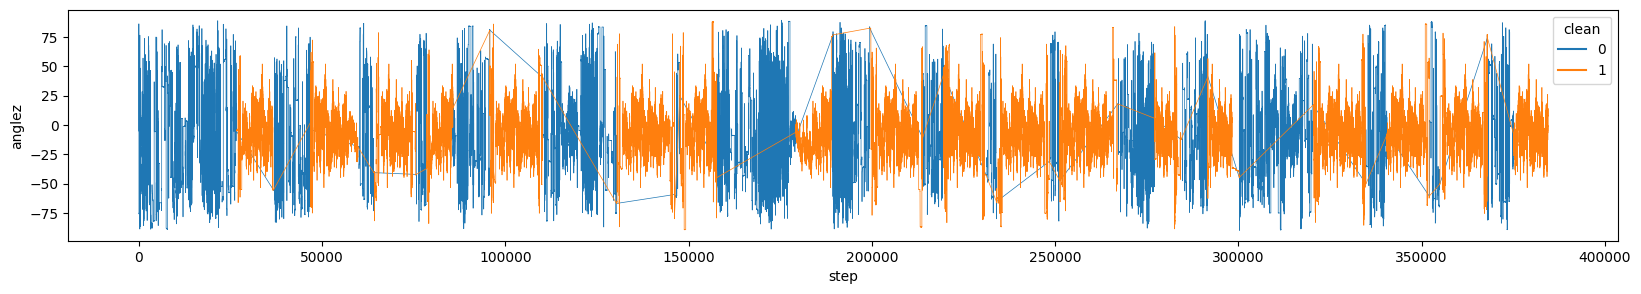

In [7]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.lineplot(data=participant_cleaning, x="step", y="anglez", hue="clean", linewidth = 0.5)

C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\timon\.conda\envs\ai-challenge\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

<Axes: xlabel='step', ylabel='anglez'>

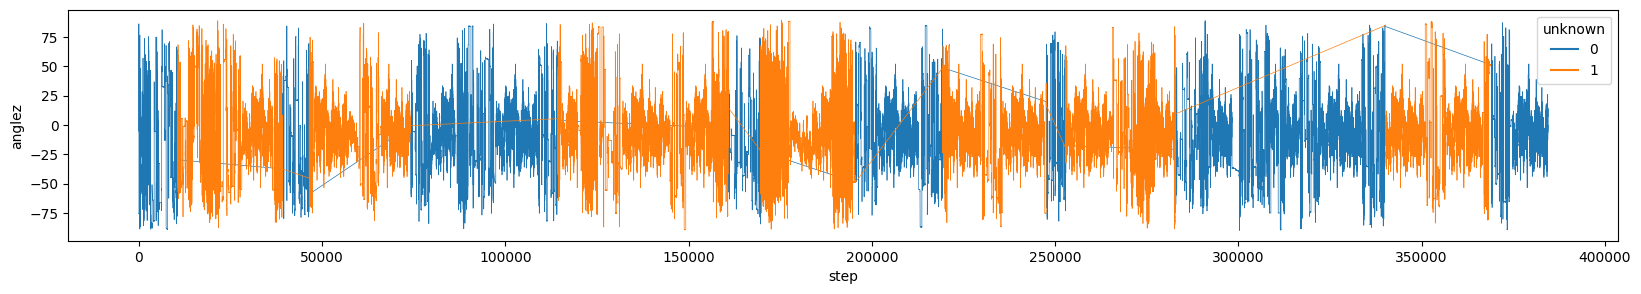

In [8]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.lineplot(data=participant_cleaning, x="step", y="anglez", hue="unknown", linewidth = 0.5)

## Accuracy pro Serie

In [9]:
series = cleaning.series_id.unique()

Text(0.5, 0, 'Series')

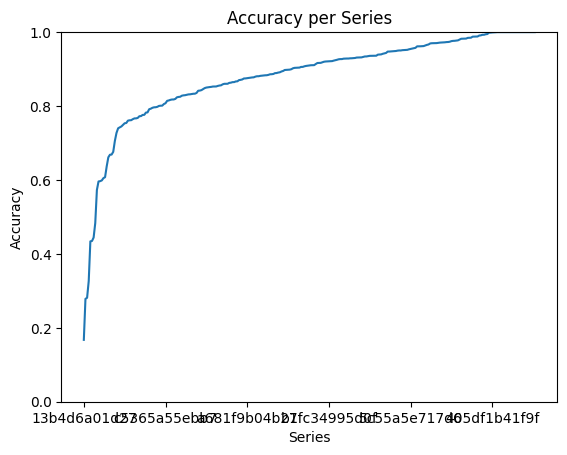

In [10]:
ax = cleaning.groupby('series_id')['correct_cleaning'].mean().sort_values().plot(
    ylim=(0, 1), title='Accuracy per Series'
)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Series")

In [11]:
cleaning.groupby('series_id')['correct_cleaning'].mean().sort_values()

series_id
13b4d6a01d27    0.167387
05e1944c3818    0.278279
60e51cad2ffb    0.281218
31011ade7c0a    0.326556
60d31b0bec3b    0.433904
                  ...   
ca730dbf521d    1.000000
af91d9a50547    1.000000
5acc9d63b5fd    1.000000
76237b9406d5    1.000000
89bd631d1769    1.000000
Name: correct_cleaning, Length: 277, dtype: float64

## Series with potentialy wrong cleaning

In [12]:
cleaning[(cleaning.clean == 1) & (cleaning.unknown == 0)].groupby('series_id')['correct_cleaning'].count().sort_values()

series_id
04f547b8017d      144
eec197a4bdca      216
971207c6a525      276
35826366dfc7      288
d0f613c700f7      456
                ...  
a167532acca2    36003
e0686434d029    36219
703b5efa9bc1    45291
db5e0ee1c0ab    63186
16fe2798ed0f    73841
Name: correct_cleaning, Length: 95, dtype: int64

In [13]:
cleaning[(cleaning.series_id == '16fe2798ed0f') & (cleaning.clean == 1) & (cleaning.unknown == 0)]

,series_id,step,timestamp,anglez,enmo,unknown,clean,correct_cleaning
13522681,16fe2798ed0f,74161,2017-11-05T23:15:05-0400,-0.6369,0.0000,0,1,0
13522682,16fe2798ed0f,74162,2017-11-05T23:15:10-0400,-0.5203,0.0000,0,1,0
13522683,16fe2798ed0f,74163,2017-11-05T23:15:15-0400,-0.7050,0.0000,0,1,0
13522684,16fe2798ed0f,74164,2017-11-05T23:15:20-0400,-0.7041,0.0000,0,1,0
13522685,16fe2798ed0f,74165,2017-11-05T23:15:25-0400,-0.5910,0.0000,0,1,0
...,...,...,...,...,...,...,...,...
13832995,16fe2798ed0f,384475,2017-11-23T21:14:35-0500,11.9902,0.0132,0,1,0
13832996,16fe2798ed0f,384476,2017-11-23T21:14:40-0500,13.2862,0.0205,0,1,0
13832997,16fe2798ed0f,384477,2017-11-23T21:14:45-0500,10.7210,0.0145,0,1,0
13832998,16fe2798ed0f,384478,2017-11-23T21:14:50-0500,13.5683,0.0280,0,1,0


In [14]:
cleaning[(cleaning.clean == 1) & ((cleaning.event == 'onset') | (cleaning.event == 'wakeup'))]

,series_id,step,timestamp,anglez,enmo,unknown,clean,event
281376,038441c925bb,281376,2018-08-30T22:18:00-0400,-81.377701,0.0130,0,1,onset
369912,038441c925bb,369912,2018-09-05T01:16:00-0400,-28.280399,0.0066,0,1,wakeup
1208052,0402a003dae9,94032,2018-12-23T23:21:00-0500,-77.354897,0.0303,0,1,onset
3223032,062dbd4c95e6,230892,2018-09-04T20:56:00-0400,-86.536301,0.0000,0,1,onset
6589836,0dee4fda51c3,356976,2019-01-25T04:48:00-0500,17.525000,0.0109,0,1,wakeup
...,...,...,...,...,...,...,...,...
119493348,efbfc4526d58,62268,2018-12-18T06:44:00-0500,-5.738300,0.0000,0,1,wakeup
120940644,f2c2436cf7b7,342264,2018-10-01T07:37:00-0400,80.207603,0.0000,0,1,wakeup
120967692,f2c2436cf7b7,369312,2018-10-02T21:11:00-0400,-10.532800,0.0781,0,1,onset
122289288,f56824b503a0,118428,2018-10-08T08:14:00-0400,-7.199000,0.0385,0,1,wakeup
